In [42]:
import pandas as pd
data_path = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\employee_attendance_productivity_dataset.csv")
print("Dataset is Successfully",data_path)

Dataset is Successfully      EmployeeID         Name  Department        Date   Status  HoursWorked  \
0          E100   Employee_0  Operations  2025-01-01  Present         6.20   
1          E100   Employee_0  Operations  2025-01-02  Present        11.21   
2          E100   Employee_0  Operations  2025-01-03  Present         8.59   
3          E100   Employee_0  Operations  2025-01-04  Present         6.61   
4          E100   Employee_0  Operations  2025-01-05  Present         7.30   
...         ...          ...         ...         ...      ...          ...   
1795       E129  Employee_29       Sales  2025-02-25   Absent         0.00   
1796       E129  Employee_29       Sales  2025-02-26  Present         9.65   
1797       E129  Employee_29       Sales  2025-02-27   Absent         0.00   
1798       E129  Employee_29       Sales  2025-02-28  Present         9.46   
1799       E129  Employee_29       Sales  2025-03-01  Present         8.18   

      ProductivityScore    JobRole  Shi

In [43]:
import pandas as pd

# 1. Load dataset
data_path = pd.read_csv(
    r"C:\Users\LENOVO\Downloads\employee_attendance_productivity_dataset.csv"
)

print("Dataset Loaded Successfully!")
print(data_path.head())


# 2. Clean Dataset

# Convert date columns to datetime
date_cols = ["Date", "Attendance_Date", "Work_Date"]
for col in date_cols:
    if col in data_path.columns:
        data_path[col] = pd.to_datetime(data_path[col], errors="coerce")

# Remove completely duplicate rows
data_path = data_path.drop_duplicates()

# Remove rows where employee ID is missing
if "Employee_ID" in data_path.columns:
    data_path = data_path.dropna(subset=["Employee_ID"])

# Standardize column names (remove spaces, make lower case)
data_path.columns = (
    data_path.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# Example: Fill missing hours worked or productivity score (optional)
if "hours_worked" in data_path.columns:
    data_path["hours_worked"] = data_path["hours_worked"].fillna(0)

if "productivity_score" in data_path.columns:
    data_path["productivity_score"] = data_path["productivity_score"].fillna(data_path["productivity_score"].mean())

print("\nCleaned Dataset Preview:")
print(data_path.head())

print("\nCleaning Done! Dataset is ready for analysis.")


Dataset Loaded Successfully!
  EmployeeID        Name  Department        Date   Status  HoursWorked  \
0       E100  Employee_0  Operations  2025-01-01  Present         6.20   
1       E100  Employee_0  Operations  2025-01-02  Present        11.21   
2       E100  Employee_0  Operations  2025-01-03  Present         8.59   
3       E100  Employee_0  Operations  2025-01-04  Present         6.61   
4       E100  Employee_0  Operations  2025-01-05  Present         7.30   

   ProductivityScore    JobRole  Shift Location  
0                 72  Associate  Night    Delhi  
1                 73  Associate  Night    Delhi  
2                 51  Associate  Night    Delhi  
3                 79  Associate  Night    Delhi  
4                 61  Associate  Night    Delhi  

Cleaned Dataset Preview:
  employeeid        name  department       date   status  hoursworked  \
0       E100  Employee_0  Operations 2025-01-01  Present         6.20   
1       E100  Employee_0  Operations 2025-01-02  Prese

In [44]:
import pandas as pd
import numpy as np

# 1. Load dataset
data_path = pd.read_csv(
    r"C:\Users\LENOVO\Downloads\employee_attendance_productivity_dataset.csv"
)

print("Dataset Loaded Successfully!")
print(data_path.head())


# -----------------------------
# 2. DATA TYPE CORRECTIONS
# -----------------------------

# Convert date-type columns automatically based on column name
for col in data_path.columns:
    if "date" in col.lower():
        data_path[col] = pd.to_datetime(data_path[col], errors="coerce")

# Convert numeric columns
numeric_cols = ["hours_worked", "productivity_score", "overtime_hours", "absent_days"]

for col in numeric_cols:
    if col in data_path.columns:
        data_path[col] = pd.to_numeric(data_path[col], errors="coerce")

# Convert categorical columns
categorical_cols = ["employee_id", "department", "job_role", "attendance_status"]

for col in categorical_cols:
    if col in data_path.columns:
        data_path[col] = data_path[col].astype("category")


# -----------------------------
# 3. HANDLE MISSING VALUES
# -----------------------------

# Fill missing numeric values with mean
for col in numeric_cols:
    if col in data_path.columns:
        data_path[col] = data_path[col].fillna(data_path[col].mean())

# Fill missing categorical values with mode
for col in categorical_cols:
    if col in data_path.columns:
        data_path[col] = data_path[col].fillna(data_path[col].mode()[0])

# Remove rows where date is missing
for col in data_path.columns:
    if "date" in col.lower():
        data_path = data_path.dropna(subset=[col])


# -----------------------------
# 4. Final Preview
# -----------------------------
print("\nCleaned Dataset Preview:")
print(data_path.head())

print("\nMissing values handled and data types corrected successfully!")


Dataset Loaded Successfully!
  EmployeeID        Name  Department        Date   Status  HoursWorked  \
0       E100  Employee_0  Operations  2025-01-01  Present         6.20   
1       E100  Employee_0  Operations  2025-01-02  Present        11.21   
2       E100  Employee_0  Operations  2025-01-03  Present         8.59   
3       E100  Employee_0  Operations  2025-01-04  Present         6.61   
4       E100  Employee_0  Operations  2025-01-05  Present         7.30   

   ProductivityScore    JobRole  Shift Location  
0                 72  Associate  Night    Delhi  
1                 73  Associate  Night    Delhi  
2                 51  Associate  Night    Delhi  
3                 79  Associate  Night    Delhi  
4                 61  Associate  Night    Delhi  

Cleaned Dataset Preview:
  EmployeeID        Name  Department       Date   Status  HoursWorked  \
0       E100  Employee_0  Operations 2025-01-01  Present         6.20   
1       E100  Employee_0  Operations 2025-01-02  Prese


Average ProductivityScore by Department:
   Department  ProductivityScore
0     Finance          67.188889
1          HR          65.750000
2          IT          66.958333
3  Operations          67.393333
4       Sales          64.904167

Departments Ranked by ProductivityScore:
   Department  ProductivityScore
3  Operations          67.393333
0     Finance          67.188889
2          IT          66.958333
1          HR          65.750000
4       Sales          64.904167

Employee Count per Department:
   Department  Employee_Count
0       Sales             480
1          HR             420
2     Finance             360
3  Operations             300
4          IT             240


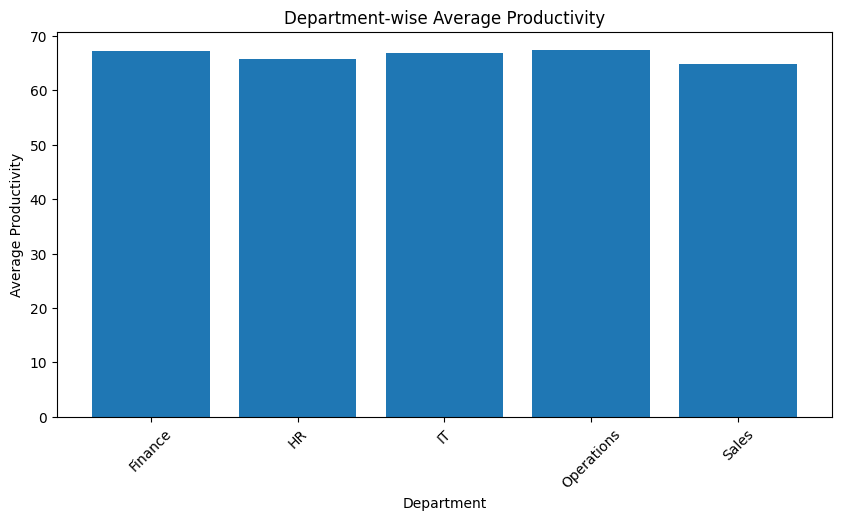

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Average Productivity by Department
department_productivity = data_path.groupby("Department")["ProductivityScore"].mean().reset_index()

print("\nAverage ProductivityScore by Department:")
print(department_productivity)

# 2. Departments Ranked by Productivity
top_departments = department_productivity.sort_values(by="ProductivityScore", ascending=False)

print("\nDepartments Ranked by ProductivityScore:")
print(top_departments)

# 3. Employee Count per Department
dept_counts = data_path["Department"].value_counts().reset_index()
dept_counts.columns = ["Department", "Employee_Count"]

print("\nEmployee Count per Department:")
print(dept_counts)

# 4. Visualization (Corrected Column Name)
plt.figure(figsize=(10,5))
plt.bar(department_productivity["Department"], department_productivity["ProductivityScore"])
plt.title("Department-wise Average Productivity")
plt.xlabel("Department")
plt.ylabel("Average Productivity")
plt.xticks(rotation=45)
plt.show()


In [69]:
import pandas as pd

data_path = pd.read_csv(
    r"C:\Users\LENOVO\Downloads\employee_attendance_productivity_dataset.csv"
)

print("Dataset is Successfully Loaded!")
print(data_path.head())

data_path["Date"] = pd.to_datetime(data_path["Date"], errors="coerce")

data_path["Month"] = data_path["Date"].dt.to_period("M")



Dataset is Successfully Loaded!
  EmployeeID        Name  Department        Date   Status  HoursWorked  \
0       E100  Employee_0  Operations  2025-01-01  Present         6.20   
1       E100  Employee_0  Operations  2025-01-02  Present        11.21   
2       E100  Employee_0  Operations  2025-01-03  Present         8.59   
3       E100  Employee_0  Operations  2025-01-04  Present         6.61   
4       E100  Employee_0  Operations  2025-01-05  Present         7.30   

   ProductivityScore    JobRole  Shift Location  
0                 72  Associate  Night    Delhi  
1                 73  Associate  Night    Delhi  
2                 51  Associate  Night    Delhi  
3                 79  Associate  Night    Delhi  
4                 61  Associate  Night    Delhi  


Dataset Loaded Successfully!
  EmployeeID        Name  Department        Date   Status  HoursWorked  \
0       E100  Employee_0  Operations  2025-01-01  Present         6.20   
1       E100  Employee_0  Operations  2025-01-02  Present        11.21   
2       E100  Employee_0  Operations  2025-01-03  Present         8.59   
3       E100  Employee_0  Operations  2025-01-04  Present         6.61   
4       E100  Employee_0  Operations  2025-01-05  Present         7.30   

   ProductivityScore    JobRole  Shift Location  
0                 72  Associate  Night    Delhi  
1                 73  Associate  Night    Delhi  
2                 51  Associate  Night    Delhi  
3                 79  Associate  Night    Delhi  
4                 61  Associate  Night    Delhi  

Correlation between Working Hours and Productivity Score:
0.7480480652944578


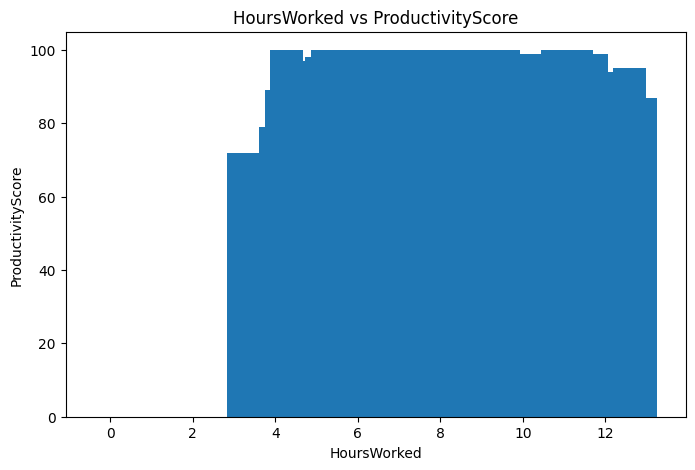

In [61]:
import pandas as pd

data_path = pd.read_csv(
    r"C:\Users\LENOVO\Downloads\employee_attendance_productivity_dataset.csv"
)

print("Dataset Loaded Successfully!")
print(data_path.head())

# Check correlation
correlation = data_path["HoursWorked"].corr(data_path["ProductivityScore"])

print("\nCorrelation between Working Hours and Productivity Score:")
print(correlation)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.bar(data_path["HoursWorked"], data_path["ProductivityScore"])
plt.title("HoursWorked vs ProductivityScore")
plt.xlabel("HoursWorked")
plt.ylabel("ProductivityScore")
plt.show()


Dataset is Successfully Loaded!
  EmployeeID        Name  Department        Date   Status  HoursWorked  \
0       E100  Employee_0  Operations  2025-01-01  Present         6.20   
1       E100  Employee_0  Operations  2025-01-02  Present        11.21   
2       E100  Employee_0  Operations  2025-01-03  Present         8.59   
3       E100  Employee_0  Operations  2025-01-04  Present         6.61   
4       E100  Employee_0  Operations  2025-01-05  Present         7.30   

   ProductivityScore    JobRole  Shift Location  
0                 72  Associate  Night    Delhi  
1                 73  Associate  Night    Delhi  
2                 51  Associate  Night    Delhi  
3                 79  Associate  Night    Delhi  
4                 61  Associate  Night    Delhi  

Average Working Hours per Shift:
     Shift  HoursWorked
0  Evening     7.070097
1  Morning     7.099222
2    Night     7.041750

Average Working Hours per Location:
  Location  HoursWorked
0    Delhi     7.040278
1   Mumb

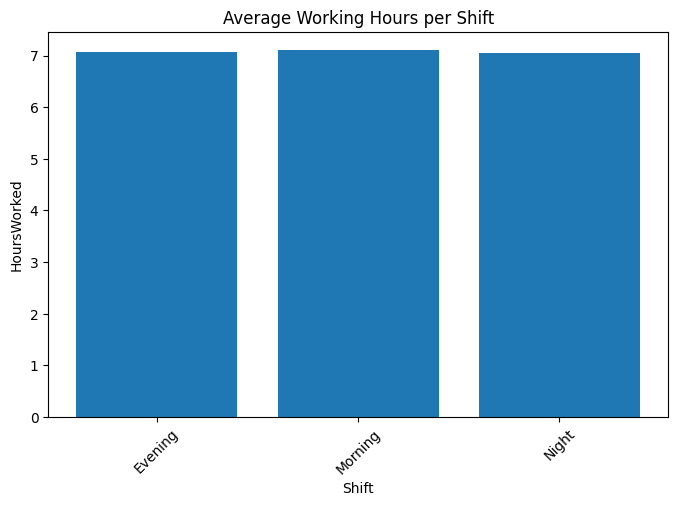

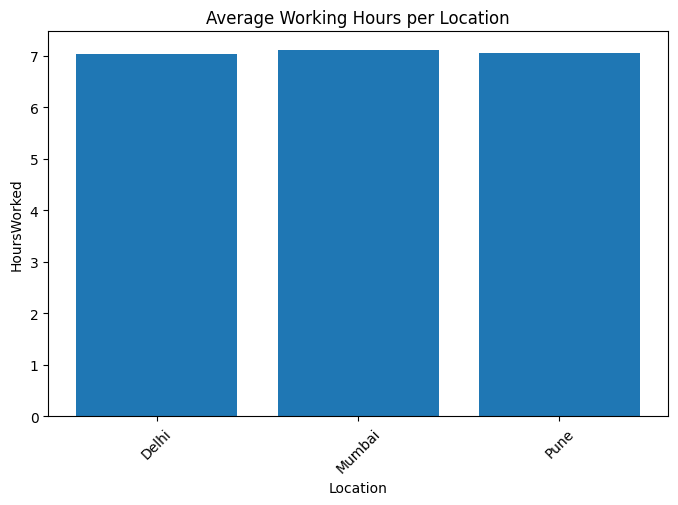

In [71]:
import pandas as pd

data_path = pd.read_csv(
    r"C:\Users\LENOVO\Downloads\employee_attendance_productivity_dataset.csv"
)

print("Dataset is Successfully Loaded!")
print(data_path.head())

avg_hours_shift = data_path.groupby("Shift")["HoursWorked"].mean().reset_index()

print("\nAverage Working Hours per Shift:")
print(avg_hours_shift)

avg_hours_location = data_path.groupby("Location")["HoursWorked"].mean().reset_index()

print("\nAverage Working Hours per Location:")
print(avg_hours_location)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(avg_hours_shift["Shift"], avg_hours_shift["HoursWorked"])
plt.title("Average Working Hours per Shift")
plt.xlabel("Shift")
plt.ylabel("HoursWorked")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,5))
plt.bar(avg_hours_location["Location"], avg_hours_location["HoursWorked"])
plt.title("Average Working Hours per Location")
plt.xlabel("Location")
plt.ylabel("HoursWorked")
plt.xticks(rotation=45)
plt.show()


Dataset is Successfully Loaded!
  EmployeeID        Name  Department        Date   Status  HoursWorked  \
0       E100  Employee_0  Operations  2025-01-01  Present         6.20   
1       E100  Employee_0  Operations  2025-01-02  Present        11.21   
2       E100  Employee_0  Operations  2025-01-03  Present         8.59   
3       E100  Employee_0  Operations  2025-01-04  Present         6.61   
4       E100  Employee_0  Operations  2025-01-05  Present         7.30   

   ProductivityScore    JobRole  Shift Location  
0                 72  Associate  Night    Delhi  
1                 73  Associate  Night    Delhi  
2                 51  Associate  Night    Delhi  
3                 79  Associate  Night    Delhi  
4                 61  Associate  Night    Delhi  


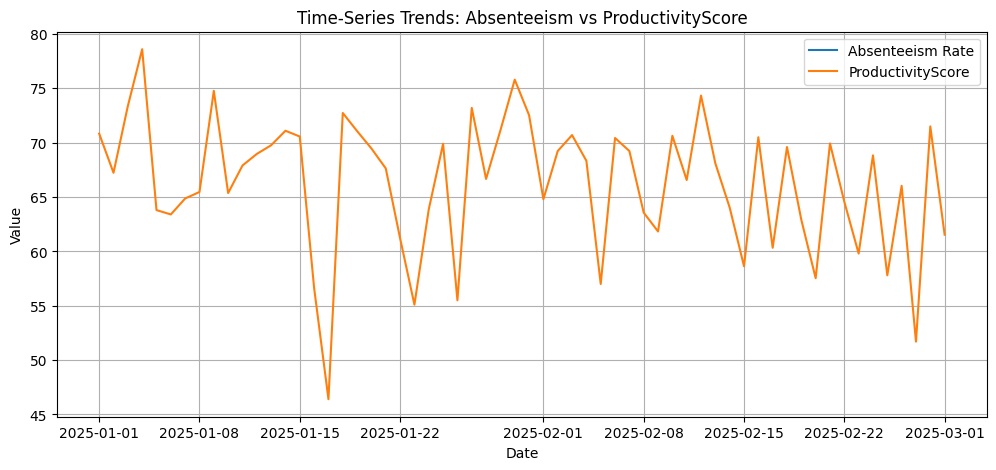

In [78]:
import pandas as pd

data_path = pd.read_csv(
    r"C:\Users\LENOVO\Downloads\employee_attendance_productivity_dataset.csv"
)

print("Dataset is Successfully Loaded!")
print(data_path.head())

data_path["Date"] = pd.to_datetime(data_path["Date"], errors="coerce")

data_path["Absent_Flag"] = data_path["Location"].map({"Absent": 1, "Present": 0})

daily_trends = data_path.groupby("Date").agg({
    "Absent_Flag": "mean",
    "ProductivityScore": "mean"
}).reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Absenteeism Trend
plt.plot(daily_trends["Date"], daily_trends["Absent_Flag"], label="Absenteeism Rate")

# Output / Productivity Trend
plt.plot(daily_trends["Date"], daily_trends["ProductivityScore"], label="ProductivityScore")

plt.title("Time-Series Trends: Absenteeism vs ProductivityScore")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
